### import libraries 

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### import Raw data

In [24]:
df = pd.read_csv("C:/Users/pcc/Desktop/all project/blinkit pythan/blinkit_data.csv")

### import Raw data

In [6]:
df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


 ## size of data 

In [7]:
df.shape

(8523, 12)

## colamuse

In [8]:
df.columns


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [10]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [16]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


## replace valuse

In [17]:
df['Item Fat Content'] = df ['Item Fat Content'].replace({'LF':'Low Fat',
                                                          'reg' : 'Regular',
                                                          'low fat' : 'Low Fat'
                                                         })

In [18]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## BUSINESS REQUIREMENTS 
## KPLS REQUIREMENTS

In [25]:
# total sales
tatal_sales = df['Sales'].sum()

#average sales 
avg_sales = df['Sales'].mean()

#no of iteams sold
no_of_items_sold = df['Sales'].count()

#average ratingi 
avg_ratings = df ['Rating'].mean()

#dispiay
print(f"total sales:${tatal_sales :,.0f}")
print(f"average sales:{avg_sales :,.0f}")
print(f"no_of_items_sold:{ no_of_items_sold:,.0f}")
print(f"avg_ratings :{avg_ratings  :,.1f}")


total sales:$1,201,681
average sales:141
no_of_items_sold:8,523
avg_ratings :4.0


## CHARTS REQUIREMENTS 
## TOTAL SALES BY FAT CONTENT

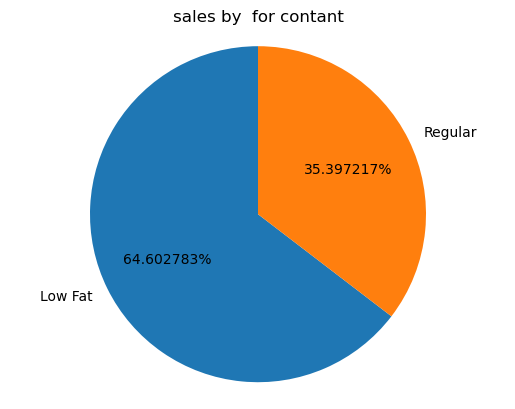

In [35]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat,labels = sales_by_fat.index ,
                    autopct = '%1f%%',
                 startangle = 90)
plt.title('sales by  for contant')
plt.axis('equal')
plt.show()


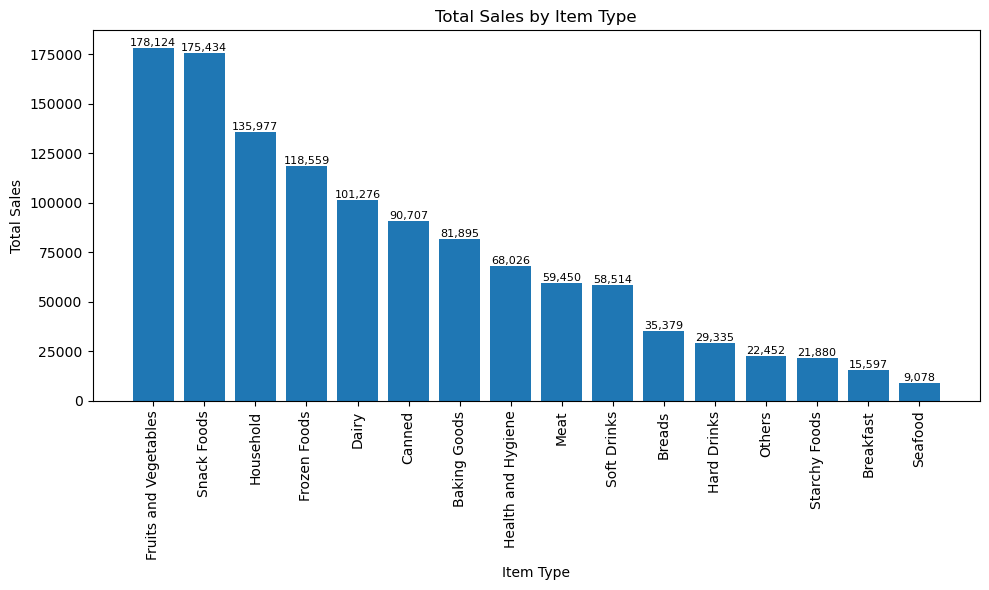

In [26]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (10 ,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():,.0f}',ha = 'center', va = 'bottom',fontsize =8 )

plt.tight_layout()
plt.show()


 ## Fat Content by Outlet for Total Sales:


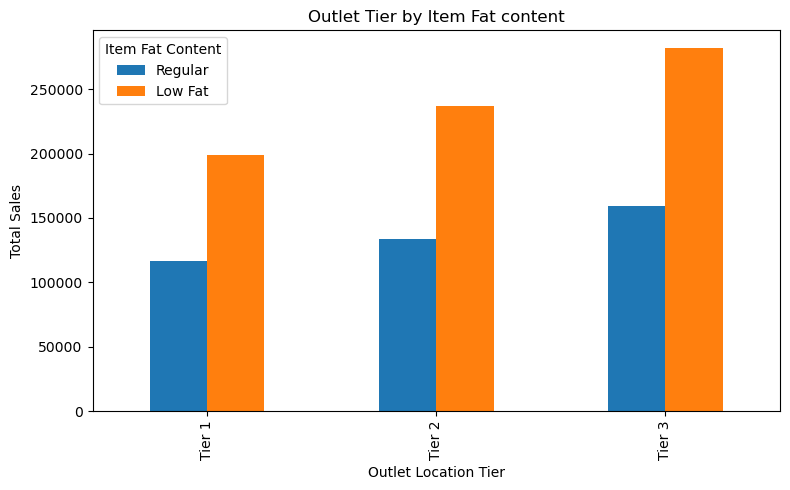

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

grouped  = df .groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()

grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot (kind = 'bar', figsize =(8,5),title ='Outlet Tier by Item Fat content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()
                 

## Fat Content by Outlet for Total Sales 

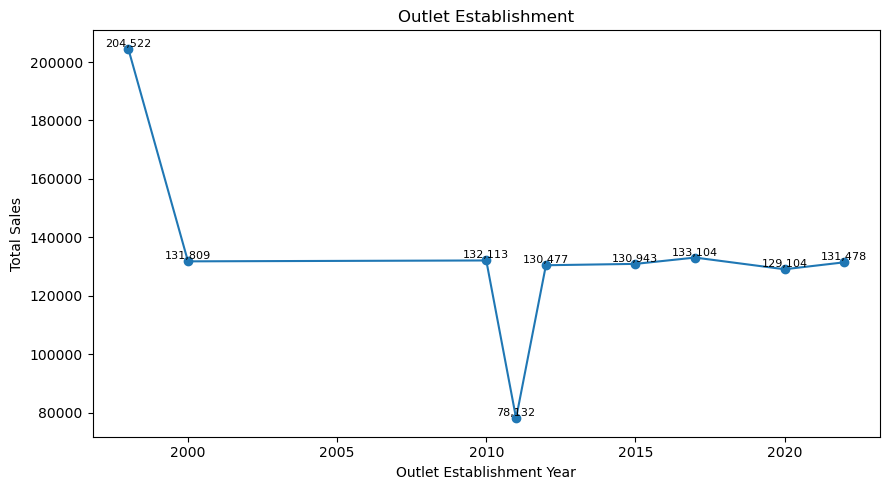

In [33]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize = (9 ,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker = 'o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip (sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha ='center',va = 'bottom',fontsize = 8)

plt.tight_layout()
plt.show()


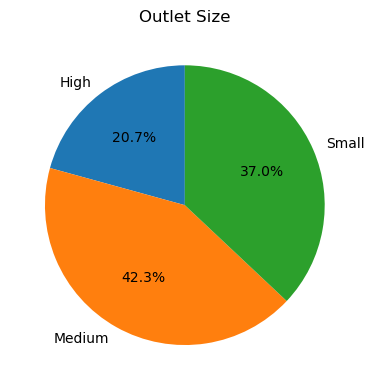

In [36]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize = (4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct = '%1.1f%%',startangle = 90 )
plt.title('Outlet Size')
plt.tight_layout()
plt.show()